In [ ]:
!pip install pymongo

In [20]:
import pandas as pd
import numpy as np
import pymongo
from pymongo import MongoClient
from pyspark import SparkContext,SQLContext
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from matplotlib import pyplot as plt

In [2]:
Client=MongoClient('mongodb://127.0.0.1/YelpData')

In [3]:
sc=SparkContext()
sqlContext=SQLContext(sc)
sparkSession=SparkSession(sc)
sparkSession.conf.set("spark.sql.execution.arrow.enabled", "true")

In [4]:
db=Client.YelpData

In [5]:
business_info_collection=db['Business_Info']
reviews_collection=db['Reviews']
user_collection=db['User']

In [6]:
Business_info_dataframe = pd.DataFrame(list(business_info_collection.find()))
reviews_dataframe = pd.DataFrame(list(reviews_collection.find()))
users_dataframe = pd.DataFrame(list(user_collection.find()))

In [7]:
Business_info_dataframe.columns

Index(['_id', 'address', 'attributes', 'business_id', 'categories', 'city',
       'hours', 'is_open', 'latitude', 'longitude', 'name', 'postal_code',
       'review_count', 'stars', 'state'],
      dtype='object')

In [8]:
Business_info_dataframe=Business_info_dataframe.drop(['_id'],axis=1)
Business_info_dataframe=Business_info_dataframe.dropna()

In [12]:
## remove quotation marks in name and address column
Business_info_dataframe.name=Business_info_dataframe.name.str.replace('"','')
Business_info_dataframe.address=Business_info_dataframe.address.str.replace('"','')
print(Business_info_dataframe.shape)
## filter restaurants of US
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]
US_Business_Data=Business_info_dataframe.loc[Business_info_dataframe['state'].isin(states)]
US_Business_Data.shape

(129268, 14)


(97611, 14)

In [13]:
us_restaurants=US_Business_Data[US_Business_Data['categories'].str.contains('Restaurants')]

In [14]:
## select out 16 cuisine types of restaurants and rename the category
us_restaurants.is_copy=False
us_restaurants['category']=pd.Series()
us_restaurants.loc[us_restaurants.categories.str.contains('American'),'category'] = 'American'
us_restaurants.loc[us_restaurants.categories.str.contains('Mexican'), 'category'] = 'Mexican'
us_restaurants.loc[us_restaurants.categories.str.contains('Italian'), 'category'] = 'Italian'
us_restaurants.loc[us_restaurants.categories.str.contains('Japanese'), 'category'] = 'Japanese'
us_restaurants.loc[us_restaurants.categories.str.contains('Chinese'), 'category'] = 'Chinese'
us_restaurants.loc[us_restaurants.categories.str.contains('Thai'), 'category'] = 'Thai'
us_restaurants.loc[us_restaurants.categories.str.contains('Mediterranean'), 'category'] = 'Mediterranean'
us_restaurants.loc[us_restaurants.categories.str.contains('French'), 'category'] = 'French'
us_restaurants.loc[us_restaurants.categories.str.contains('Vietnamese'), 'category'] = 'Vietnamese'
us_restaurants.loc[us_restaurants.categories.str.contains('Greek'),'category'] = 'Greek'
us_restaurants.loc[us_restaurants.categories.str.contains('Indian'),'category'] = 'Indian'
us_restaurants.loc[us_restaurants.categories.str.contains('Korean'),'category'] = 'Korean'
us_restaurants.loc[us_restaurants.categories.str.contains('Hawaiian'),'category'] = 'Hawaiian'
us_restaurants.loc[us_restaurants.categories.str.contains('African'),'category'] = 'African'
us_restaurants.loc[us_restaurants.categories.str.contains('Spanish'),'category'] = 'Spanish'
us_restaurants.loc[us_restaurants.categories.str.contains('Middle_eastern'),'category'] = 'Middle_eastern'

C:\Users\aki55\Anaconda3\lib\site-packages\pandas\core\generic.py:5079: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\aki55\Anaconda3\lib\site-packages\pandas\core\generic.py:5080: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


In [15]:
us_restaurants=us_restaurants.dropna(axis=0, subset=['category'])
##del us_restaurants['categories']
us_restaurants=us_restaurants.reset_index(drop=True)
us_restaurants.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state,category
0,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC,Japanese
1,5981 Andrews Rd,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...",fweCYi8FmbJXHCqLnwuk8w,"Italian, Restaurants, Pizza, Chicken Wings",Mentor-on-the-Lake,"{'Monday': '10:0-0:0', 'Tuesday': '10:0-0:0', ...",1,41.708520,-81.359556,Marco's Pizza,44060,16,4.0,OH,Italian
2,2450 E Indian School Rd,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...",1Dfx3zM-rW4n-31KeC8sJg,"Restaurants, Breakfast & Brunch, Mexican, Taco...",Phoenix,"{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W...",1,33.495194,-112.028588,Taco Bell,85016,18,3.0,AZ,Mexican
3,6055 E Lake Mead Blvd,"{'BikeParking': 'True', 'BusinessParking': '{'...",tstimHoMcYbkSC4eBA1wEg,"Mexican, Restaurants, Patisserie/Cake Shop, Fo...",Las Vegas,"{'Monday': '11:0-21:0', 'Tuesday': '10:0-21:0'...",1,36.195615,-115.040529,Maria's Mexican Restaurant & Bakery,89156,184,4.5,NV,Mexican
4,6401 Morrison Blvd,"{'Alcohol': 'u'full_bar'', 'BusinessAcceptsCre...",BvYU3jvGd0TJ7IyZdfiN2Q,"Sandwiches, Italian, American (Traditional), A...",Charlotte,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",0,35.156338,-80.831878,Manzetti's Tavern,28211,16,3.5,NC,Italian


In [16]:
USA_business_sql_df=sqlContext.createDataFrame(us_restaurants)

C:\Users\aki55\Anaconda3\lib\site-packages\pyspark\sql\session.py:714: UserWarning: createDataFrame attempted Arrow optimization because 'spark.sql.execution.arrow.enabled' is set to true; however, failed by the reason below:
  PyArrow >= 0.8.0 must be installed; however, it was not found.
Attempting non-optimization as 'spark.sql.execution.arrow.fallback.enabled' is set to true.
  warnings.warn(msg)


In [17]:
USA_business_sql_df.show()

+--------------------+--------------------+--------------------+--------------------+------------------+--------------------+-------+-------------+---------------+--------------------+-----------+------------+-----+-----+-------------+
|             address|          attributes|         business_id|          categories|              city|               hours|is_open|     latitude|      longitude|                name|postal_code|review_count|stars|state|     category|
+--------------------+--------------------+--------------------+--------------------+------------------+--------------------+-------+-------------+---------------+--------------------+-----------+------------+-----+-----+-------------+
|10110 Johnston Rd...|[BikeParking -> T...|gnKjwL_1w79qoiV3I...|Sushi Bars, Resta...|         Charlotte|[Thursday -> 17:3...|      1|    35.092564|     -80.859132|Musashi Japanese ...|      28210|         170|  4.0|   NC|     Japanese|
|     5981 Andrews Rd|[BikeParking -> T...|fweCYi8FmbJXH

In [18]:
Business = USA_business_sql_df.select(USA_business_sql_df.category, USA_business_sql_df.state, USA_business_sql_df.city, USA_business_sql_df.stars, USA_business_sql_df.review_count)
Business.registerTempTable("Business_Agg")
result = sqlContext.sql("SELECT Business_Agg.city, Business_Agg.category, Business_Agg.state,\
                        AVG(Business_Agg.review_count) As AverageReview_Count,AVG(Business_Agg.stars) as AverageStars \
                        FROM Business_Agg\
                        GROUP BY Business_Agg.city, Business_Agg.category, Business_Agg.state\
                         having Business_Agg.state='NC'")

C:\Users\aki55\Anaconda3\lib\site-packages\pyspark\sql\dataframe.py:2110: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.enabled' is set to true; however, failed by the reason below:
  PyArrow >= 0.8.0 must be installed; however, it was not found.
Attempting non-optimization as 'spark.sql.execution.arrow.fallback.enabled' is set to true.
  warnings.warn(msg)


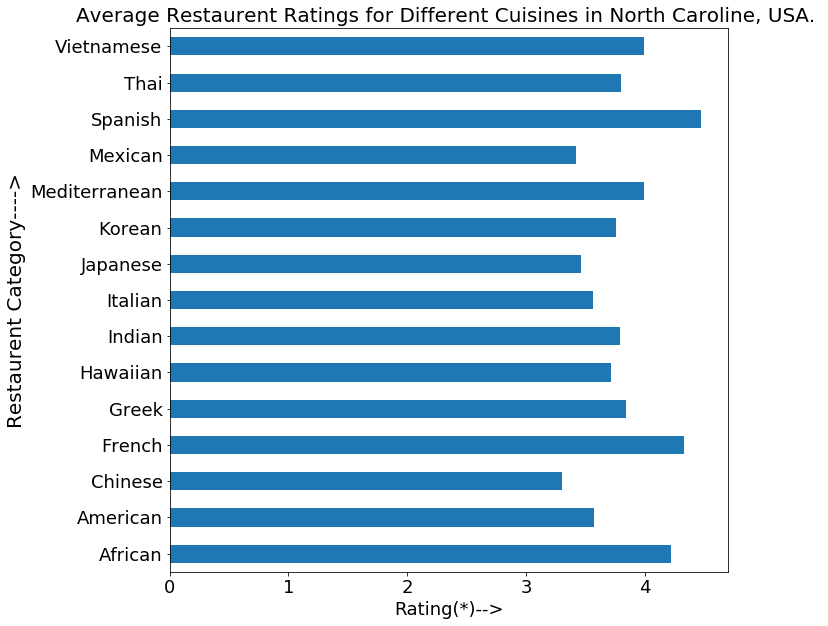

In [21]:
_=plt.figure(figsize=(10,10))
result.toPandas().groupby('category')['AverageStars'].mean().plot(kind='barh',fontsize=18)
_=plt.title('Average Restaurent Ratings for Different Cuisines in North Caroline, USA. ',fontsize=20)
_=plt.xlabel('Rating(*)-->',fontsize=18)
_=plt.ylabel('Restaurent Category---->',fontsize=20)

In [25]:
reviews_dataframe.columns

Index(['business_id', 'cool', 'date', 'funny', 'review_id', 'stars', 'text',
       'useful', 'user_id'],
      dtype='object')

In [24]:
reviews_dataframe=reviews_dataframe.drop(['_id'],axis=1)
reviews_dataframe=reviews_dataframe.dropna()

In [26]:
reviews_sql_df=sqlContext.createDataFrame(reviews_dataframe)

C:\Users\aki55\Anaconda3\lib\site-packages\pyspark\sql\session.py:714: UserWarning: createDataFrame attempted Arrow optimization because 'spark.sql.execution.arrow.enabled' is set to true; however, failed by the reason below:
  PyArrow >= 0.8.0 must be installed; however, it was not found.
Attempting non-optimization as 'spark.sql.execution.arrow.fallback.enabled' is set to true.
  warnings.warn(msg)


In [27]:
reviews_sql_df.show(5)

+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|         business_id|cool|               date|funny|           review_id|stars|                text|useful|             user_id|
+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|ujmEBvifdJM6h6RLv...|   0|2013-05-07 04:34:36|    1|Q1sbwvVQXV2734tPg...|    1|Total bill for th...|     6|hG7b0MtEbXx5QzbzE...|
|NZnhc2sEQy3RmzKTZ...|   0|2017-01-14 21:30:33|    0|GJXCdrto3ASJOqKeV...|    5|I *adore* Travis ...|     0|yXQM5uF2jS6es16SJ...|
|WTqjgwHlXbSFevF32...|   0|2016-11-09 20:09:03|    0|2TzJjDVDEuAW6MR5V...|    5|I have to say tha...|     3|n6-Gk65cPZL6Uz8qR...|
|ikCg8xy5JIg_NGPx-...|   0|2018-01-09 20:56:38|    0|yi0R0Ugj_xUx_Nek0...|    5|Went in for a lun...|     0|dacAIZ6fTM6mqwW5u...|
|b1b1eb3uo-w561D0Z...|   0|2018-01-30 23:07:38|    0|11a8sVPMUFtaC7_AB...|    1|Today was 

In [47]:
Reviews = reviews_sql_df.select(reviews_sql_df.business_id, reviews_sql_df.review_id, reviews_sql_df.stars, reviews_sql_df.text)
Reviews.registerTempTable("Reviews_Temp")

Business_temp = USA_business_sql_df.select(USA_business_sql_df.name,USA_business_sql_df.business_id)
Business_temp.registerTempTable("Business")

result2 = sqlContext.sql("SELECT DISTINCT Business.name as BusinessName,Reviews_Temp.stars,Reviews_Temp.text as ReviewText\
                        FROM Business join Reviews_Temp\
                        ON Business.business_id=Reviews_Temp.business_id\
                        ")

In [48]:
result2.show(5)

+--------------------+-----+--------------------+
|        BusinessName|stars|          ReviewText|
+--------------------+-----+--------------------+
|      Cafe Hollander|    3|I have heard stor...|
|Mitchell's Fish M...|    4|Very very good ch...|
| 1455 American Grill|    5|Burgers are great...|
|SUSHISAMBA - Las ...|    3|Meh.  Was there f...|
|The Arrogant Butcher|    4|This place is goo...|
+--------------------+-----+--------------------+
only showing top 5 rows

